In [14]:
import requests
import json
from datetime import datetime
import matplotlib.pyplot as plt

Latitude: -5.79448
Longitude: -35.211

Previsão horária de temperatura:

Data: 30/08/2024 - 00:00:00 | Temperatura: 24.0°C
Data: 30/08/2024 - 01:00:00 | Temperatura: 24.1°C
Data: 30/08/2024 - 02:00:00 | Temperatura: 24.3°C
Data: 30/08/2024 - 03:00:00 | Temperatura: 24.3°C
Data: 30/08/2024 - 04:00:00 | Temperatura: 23.8°C
Data: 30/08/2024 - 05:00:00 | Temperatura: 23.2°C
Data: 30/08/2024 - 06:00:00 | Temperatura: 23.1°C
Data: 30/08/2024 - 07:00:00 | Temperatura: 24.2°C
Data: 30/08/2024 - 08:00:00 | Temperatura: 25.3°C
Data: 30/08/2024 - 09:00:00 | Temperatura: 26.7°C
Data: 30/08/2024 - 10:00:00 | Temperatura: 27.3°C
Data: 30/08/2024 - 11:00:00 | Temperatura: 27.8°C
Data: 30/08/2024 - 12:00:00 | Temperatura: 28.0°C
Data: 30/08/2024 - 13:00:00 | Temperatura: 27.9°C
Data: 30/08/2024 - 14:00:00 | Temperatura: 27.6°C
Data: 30/08/2024 - 15:00:00 | Temperatura: 27.1°C
Data: 30/08/2024 - 16:00:00 | Temperatura: 26.3°C
Data: 30/08/2024 - 17:00:00 | Temperatura: 25.6°C
Data: 30/08/2024 - 18:00:00

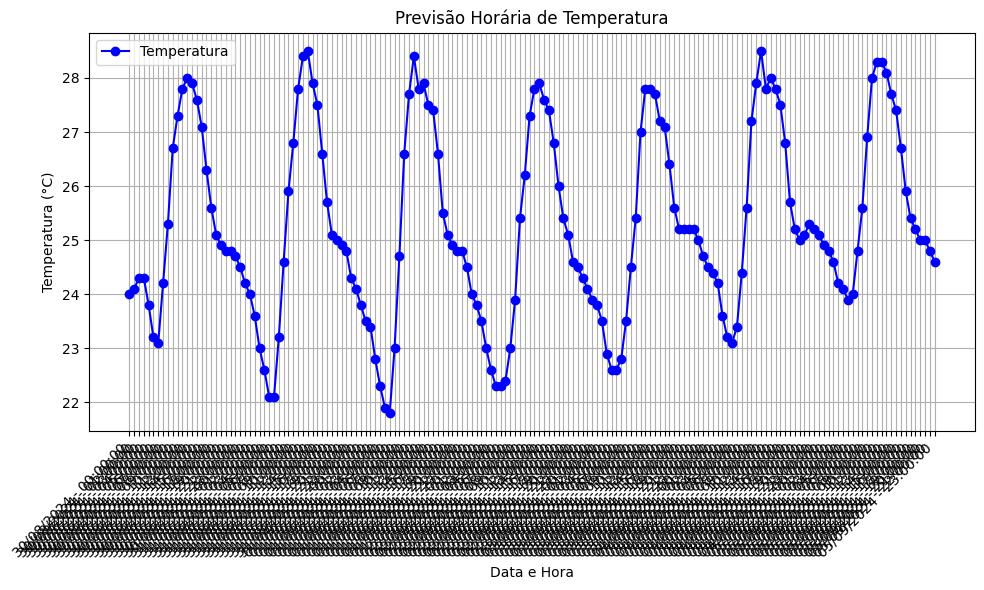

In [16]:
url = 'https://api.open-meteo.com/v1/forecast'
params = {
    'latitude': -5.79448,
    'longitude': -35.211,
    'hourly': 'temperature_2m',
    'timezone': 'America/Sao_Paulo',
    'past_days': 7,
    'forecast_days': 0,
}
response = requests.get(url, params=params)  # Correção: requests.get

# Verifica se a requisição foi bem-sucedida
# if response.status_code == 200:
#     response_json = response.json()  # Extrai os dados em formato JSON
#     print(response_json)  # Exibe a resposta JSON
# else:
#     print(f"Erro na requisição: {response.status_code}")

# if response.status_code == 200:
#     response_json = response.json()
#     temperaturas = response_json.get('hourly', {}).get('temperature_2m', [])
    
#     # Exibe a lista de temperaturas
#     for temp in temperaturas:
#         print(f"Temperatura: {temp}°C")


# Verifica se a requisição foi bem-sucedida
if response.status_code == 200:
    response_json = response.json()  # Extrai os dados em formato JSON
    
    # Extrai latitude e longitude dos parâmetros usados
    latitude = params['latitude']
    longitude = params['longitude']
    
    # Extrai temperaturas e horários do JSON
    temperaturas = response_json.get('hourly', {}).get('temperature_2m', [])
    horarios = response_json.get('hourly', {}).get('time', [])

    # Converte os horários para o formato desejado e cria listas para o gráfico
    horarios_formatados = [
        datetime.strptime(hora, "%Y-%m-%dT%H:%M").strftime("%d/%m/%Y - %H:%M:%S") 
        for hora in horarios
    ]
    
    # Exibe a latitude e longitude
    print(f"Latitude: {latitude}")
    print(f"Longitude: {longitude}")
    print("\nPrevisão horária de temperatura:\n")
    
    # Exibe a lista de temperaturas com seus horários correspondentes
    for hora, temp in zip(horarios, temperaturas):
        # Converte o formato de hora ISO para o formato desejado dd/mm/aaaa - hh:mm:ss
        hora_formatada = datetime.strptime(hora, "%Y-%m-%dT%H:%M").strftime("%d/%m/%Y - %H:%M:%S")
        print(f"Data: {hora_formatada} | Temperatura: {temp}°C")



    # Criação do gráfico
    plt.figure(figsize=(10, 6))  # Define o tamanho da figura
    plt.plot(horarios_formatados, temperaturas, marker='o', color='b', linestyle='-', label='Temperatura')
    
    # Define título e rótulos dos eixos
    plt.title('Previsão Horária de Temperatura')
    plt.xlabel('Data e Hora')
    plt.ylabel('Temperatura (°C)')
    plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo X para melhor visualização
    plt.grid(True)  # Adiciona uma grade ao gráfico
    
    # Ajusta o espaçamento para evitar sobreposição dos rótulos no eixo X
    plt.tight_layout()
    
    # Exibe a legenda e o gráfico
    plt.legend()
    plt.show()
    
else:
    print(f"Erro na requisição: {response.status_code}")
